# Разархивирование файла

In [1]:
! unrar e -r feedback.csv.rar 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from feedback.csv.rar

Extracting  X_train.csv                                                    1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%  OK 
All OK


# Загрузка библиотек

In [190]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pymorphy2
import numpy as np
import random
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from stop_words import get_stop_words
import sys
import re
import math

from tqdm import tqdm
stop_words = stop_words = get_stop_words('ru')

from matplotlib import pyplot as plt
%matplotlib inline

# Загрузка выборки

In [268]:
df = pd.read_csv('X_train.csv')
df[:3]

,sku,categoryLevel1Id,categoryLevel2Id,brandId,property,userName,reting,date,comment,commentNegative,commentPositive
0,20005023,401,4010201,826,"[{34: 'f982777489055c6563d68c005fd24aad'}, {36...",b2898a81b45310b30beb8fc0c0a9ce1e,2.0,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",NaN,NaN
1,20020647,403,4030101,1425,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",538c73d64461e13907bb95c51c38bfbc,2.0,2010-07-04,Через 2 месяца после истечении гарантийного ср...,NaN,NaN
2,20020701,401,4010401,124,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",ddca2d0101513a6209db7868eed8be05,4.0,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,NaN,NaN


# Извлечение всехотзывов из таблицы

In [269]:
X, y = [],[]
for i in df[['comment', 'commentNegative', 'commentPositive']].get_values():
    temp = i[0]
    for t in i[1:]:
        if type(t) != type(1.0):
            temp += t            
    X.append(temp)
df['text'] = X

simple_count_vectorizer = CountVectorizer(min_df=0.0001, max_df=0.95, analyzer="word", stop_words=stop_words)
X = simple_count_vectorizer.fit_transform((line for line in X))
y = np.array(df['reting'])

print("X.shape:\t"+str(X.shape)+"\ny.shape:\t"+str(y.shape))


X.shape:	(15587, 26504)
y.shape:	(15587,)


In [270]:
for key in ['sku', 'categoryLevel1Id', 'categoryLevel2Id', 'brandId', 'userName']:
    lst = list(df[key].unique())
    df[key+"_mod"] = [lst.index(i) for i in df[key]]
    
X_mod =  df[['sku_mod', 'categoryLevel1Id_mod', 'categoryLevel2Id_mod', 'brandId_mod', 'userName_mod', 'text']]
y_mod = df['reting']

X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.4, random_state=0)
del X_train['text'], X_test['text']

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_predict_mod = clf.predict(X_test)
print('RF Regressor, without text')
print(mean_squared_error([i for i in y_predict_mod], [i for i in y_test]))
print(accuracy_score([int(i) for i in y_predict_mod], [int(i) for i in y_test]))



clf = RandomForestClassifier()
clf.fit(X_train, [int(i) for i in y_train])
y_predict_mod = clf.predict(X_test)

print('RF Classifier, without text')
print(mean_squared_error([i for i in y_predict_mod], [i for i in y_test]))
print(accuracy_score([int(i) for i in y_predict_mod], [int(i) for i in y_test]))



RF Regressor, without text
1.95289208791
0.177225340818
RF Classifier, without text
2.79826623897
0.482919005613


## Обучаем random forest

In [271]:
# X_train, X_test, y_train, y_test = train_test_split(df,df, test_size=0.4, random_state=0)

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble     import RandomForestClassifier, RandomForestRegressor
Epochs = 10
accuracy_list = []

temp = []

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train = X[X_train.index]
X_test  = X[X_test.index]
# y_train = df.icol[y_train.index]['reting']
# y_test  = df.icol[y_test.index]['reting']

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,  y_train)
y_predict = model.predict(X_test)

print('RF Regressor, only text')
print(mean_squared_error([i for i in y_predict], [i for i in y_test]))
print(accuracy_score([int(i) for i in y_predict], [int(i) for i in y_test]))

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, [int(i) for i in y_train])
y_predict = model.predict(X_test)

print('RF Classifier, only text')
print(mean_squared_error([i for i in y_predict], [i for i in y_test]))
print(accuracy_score([int(i) for i in y_predict], [int(i) for i in y_test]))


# print('1.1636271056\n0.267361668003')


RF Regressor, only text
1.1731609936
0.27056936648
RF Classifier, only text
1.16817508701
0.264955894146


In [134]:
df2 = df.groupby('brandId').mean()

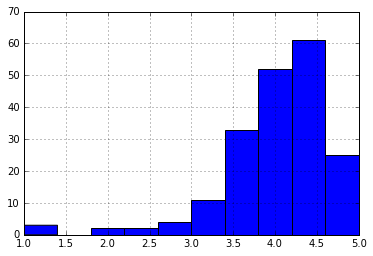

In [135]:
df2['reting'].hist()

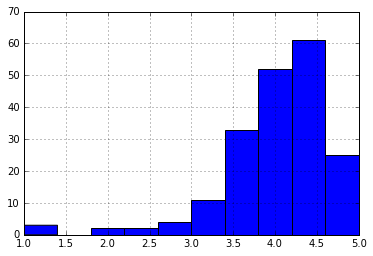

In [136]:
df2['reting'].hist()